In [1]:
## Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df['Gender'].replace(value = 0, to_replace = 'Female',inplace=True)
df['Gender'].replace(value = 1, to_replace = 'Male',inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [3]:
scaler = StandardScaler()
df [['EstimatedSalary']] = scaler.fit_transform(df[['EstimatedSalary']])

In [4]:
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, 4].values

In [5]:
## Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [8]:
accuracy_score(y_test, y_pred)

0.91

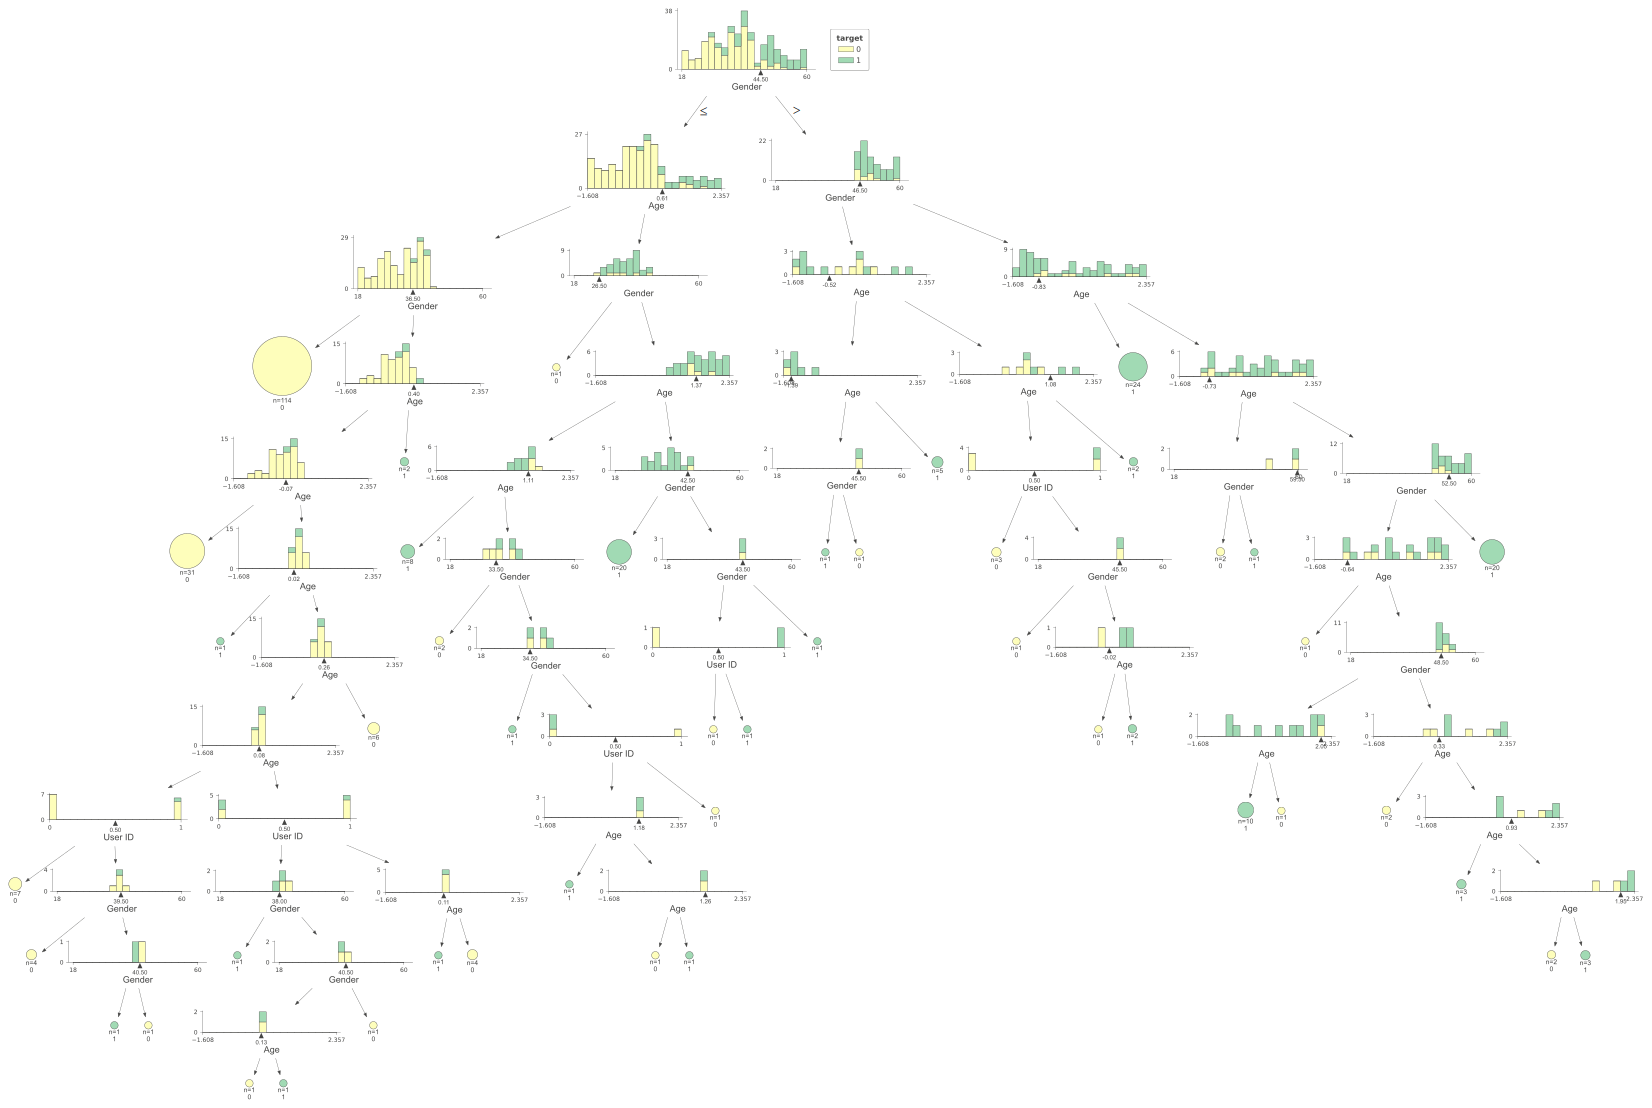

In [12]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clf,
               X_train, y_train,
               target_name="target",
               feature_names=list(df.columns),
               class_names = [0, 1])
viz